### En este Jupyter voy a cargar los datos y voy a realizar la limpieza de los datos y su posterior analisis.

In [94]:
# Cargamos las librerias.
import pandas as pd
import numpy as np


In [95]:
df = pd.read_csv('../../../Panda/Laboratorio_Python/df_unido.csv')
df
pd.options.display.float_format = '{:,.2f}'.format


In [96]:
# Miro si hay columnas con datos nulos y que me  los muestre
df.columns.isnull().sum()

np.int64(0)

In [97]:
# Miro si hay columnas con datos duplicados y  que me los muestre
df.columns.duplicated().sum()

np.int64(0)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026299 entries, 0 to 1026298
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   CODIGO ORGANO SUPERIOR      1026299 non-null  int64 
 1   NOMBRE ORGANO SUPERIOR      1026299 non-null  object
 2   CODIGO ORGANO               1026299 non-null  int64 
 3   NOMBRE ORGANO               1026299 non-null  object
 4   CODIGO UNIDAD GESTORA       1026299 non-null  int64 
 5   NOMBRE UNIDAD GESTORA       1026299 non-null  object
 6   CATEGORIA ECONOMICA         1026299 non-null  object
 7   ORIGEN INGRESO              1026299 non-null  object
 8   TIPO INGRESO                1026299 non-null  object
 9   DETALLE                     1026299 non-null  object
 10  VALOR PREVISTO ACTUALIZADO  1026299 non-null  object
 11  VALOR REGISTRADO            1026299 non-null  object
 12  VALOR REALIZADO             1026299 non-null  object
 13  PORCENTAJE R

### Analizo con Info y veo que los datos monetarios no estan en tipo int por lo que decido cambiarlos.


In [99]:
# Convertir las columnas monetarias a tipo numérico
columnas_monetarias = ['VALOR PREVISTO ACTUALIZADO', 'VALOR REGISTRADO', 'VALOR REALIZADO', 'PORCENTAJE REALIZADO']
columnas_monetarias


['VALOR PREVISTO ACTUALIZADO',
 'VALOR REGISTRADO',
 'VALOR REALIZADO',
 'PORCENTAJE REALIZADO']

In [100]:
# Eliminar posibles símbolos de moneda y comas, luego convertir a float
for col in columnas_monetarias:
    df[col] = df[col].replace({r'[^\d.]': ''}, regex=True).astype(float)


In [101]:
# Convertir la columna de fecha a tipo datetime
#df['FECHA REGISTRO'] = pd.to_datetime(df['FECHA REGISTRO'], errors='coerce')
df['FECHA REGISTRO'] = pd.to_datetime(df['FECHA REGISTRO'], format="mixed")

In [102]:
# Verificar que las conversiones se han realizado correctamente
print(df.dtypes)





CODIGO ORGANO SUPERIOR                 int64
NOMBRE ORGANO SUPERIOR                object
CODIGO ORGANO                          int64
NOMBRE ORGANO                         object
CODIGO UNIDAD GESTORA                  int64
NOMBRE UNIDAD GESTORA                 object
CATEGORIA ECONOMICA                   object
ORIGEN INGRESO                        object
TIPO INGRESO                          object
DETALLE                               object
VALOR PREVISTO ACTUALIZADO           float64
VALOR REGISTRADO                     float64
VALOR REALIZADO                      float64
PORCENTAJE REALIZADO                 float64
FECHA REGISTRO                datetime64[ns]
AÑO EJERCICIO                          int64
dtype: object


In [103]:
# Identifico si hay valores nulos en las columnas.
print(df.isnull().sum())  

CODIGO ORGANO SUPERIOR          0
NOMBRE ORGANO SUPERIOR          0
CODIGO ORGANO                   0
NOMBRE ORGANO                   0
CODIGO UNIDAD GESTORA           0
NOMBRE UNIDAD GESTORA           0
CATEGORIA ECONOMICA             0
ORIGEN INGRESO                  0
TIPO INGRESO                    0
DETALLE                         0
VALOR PREVISTO ACTUALIZADO      0
VALOR REGISTRADO                0
VALOR REALIZADO                 0
PORCENTAJE REALIZADO            0
FECHA REGISTRO                578
AÑO EJERCICIO                   0
dtype: int64


In [104]:
#### Veo que la columna Fecha de registro tiene 578 valores nulos. 
valores_unicos = df['FECHA REGISTRO']
valores_unicos

0         2013-12-31
1         2013-12-31
2         2013-12-31
3         2013-12-31
4         2013-12-31
             ...    
1026294   2021-04-23
1026295   2021-11-22
1026296   2021-04-23
1026297   2021-10-05
1026298   2021-03-23
Name: FECHA REGISTRO, Length: 1026299, dtype: datetime64[ns]

   - Revisar posibles inconsistencias en las categorías económicas (errores tipográficos, variaciones en los nombres) y unificarlas.



In [105]:
# Reviso la categoria Economica para ver si hay valores que pueda unificar.
categorias_unicas = df['CATEGORIA ECONOMICA'].unique()
print(categorias_unicas)


['Receitas Correntes' 'Receitas de Capital'
 'Receitas Correntes - intra-orçamentárias' 'Sem informação'
 'Receitas de Capital - intra-orçamentárias']


In [106]:
# Hago un value counts para revisarla y veo que hay datos que puedo unificar
frecuencias = df['CATEGORIA ECONOMICA'].value_counts()
print(frecuencias)


CATEGORIA ECONOMICA
Receitas Correntes                           979596
Receitas de Capital                           30116
Receitas Correntes - intra-orçamentárias      16235
Sem informação                                  257
Receitas de Capital - intra-orçamentárias        95
Name: count, dtype: int64


In [107]:
# Cambio los nombres a Receitas corrientes de los valores que he identificado que podia unir.
df['CATEGORIA ECONOMICA'] = df['CATEGORIA ECONOMICA'].replace({
    'Receitas Correntes': 'Receitas Correntes',
    'receitas correntes': 'Receitas Correntes',
    'Rec Correntes': 'Receitas Correntes'})


In [108]:
# Hago un print para comprobar que se me han quedado menos valores unicos.
print(df['CATEGORIA ECONOMICA'].value_counts())


CATEGORIA ECONOMICA
Receitas Correntes                           979596
Receitas de Capital                           30116
Receitas Correntes - intra-orçamentárias      16235
Sem informação                                  257
Receitas de Capital - intra-orçamentárias        95
Name: count, dtype: int64


   - Analizar las categorías de ingresos más significativas y su participación en los ingresos totales.


In [109]:
# Hago un analisis sobre la categoria economica y el valor realizado.
ingresos_por_categoria = df.groupby('CATEGORIA ECONOMICA')['VALOR REALIZADO'].sum().reset_index()
ingresos_por_categoria

,CATEGORIA ECONOMICA,VALOR REALIZADO
0,Receitas Correntes,"1,433,420,728,911,773.00"
1,Receitas Correntes - intra-orçamentárias,"29,289,747,777,513.00"
2,Receitas de Capital,"1,278,346,381,112,497.00"
3,Receitas de Capital - intra-orçamentárias,"2,826,909,328,571.00"
4,Sem informação,"4,657.00"


In [110]:
# Aqui hago una suma de los valores realizados y luego creo una columna nueva y hago la particion para que me saque los valores dividos los ingresos totales.
ingresos_totales = ingresos_por_categoria['VALOR REALIZADO'].sum()
ingresos_por_categoria['PARTICIPACION'] = (ingresos_por_categoria['VALOR REALIZADO'] / ingresos_totales) * 100
ingresos_por_categoria

,CATEGORIA ECONOMICA,VALOR REALIZADO,PARTICIPACION
0,Receitas Correntes,"1,433,420,728,911,773.00",52.24
1,Receitas Correntes - intra-orçamentárias,"29,289,747,777,513.00",1.07
2,Receitas de Capital,"1,278,346,381,112,497.00",46.59
3,Receitas de Capital - intra-orçamentárias,"2,826,909,328,571.00",0.10
4,Sem informação,"4,657.00",0.00


In [111]:
# Aqui ordeno de mayor a menor para que para que muestre mejor los resultados.
ingresos_por_categoria = ingresos_por_categoria.sort_values(by='VALOR REALIZADO', ascending=False)
print(ingresos_por_categoria)



                         CATEGORIA ECONOMICA          VALOR REALIZADO  \
0                         Receitas Correntes 1,433,420,728,911,773.00   
2                        Receitas de Capital 1,278,346,381,112,497.00   
1   Receitas Correntes - intra-orçamentárias    29,289,747,777,513.00   
3  Receitas de Capital - intra-orçamentárias     2,826,909,328,571.00   
4                             Sem informação                 4,657.00   

   PARTICIPACION  
0          52.24  
2          46.59  
1           1.07  
3           0.10  
4           0.00  


In [112]:
import matplotlib.pyplot as plt


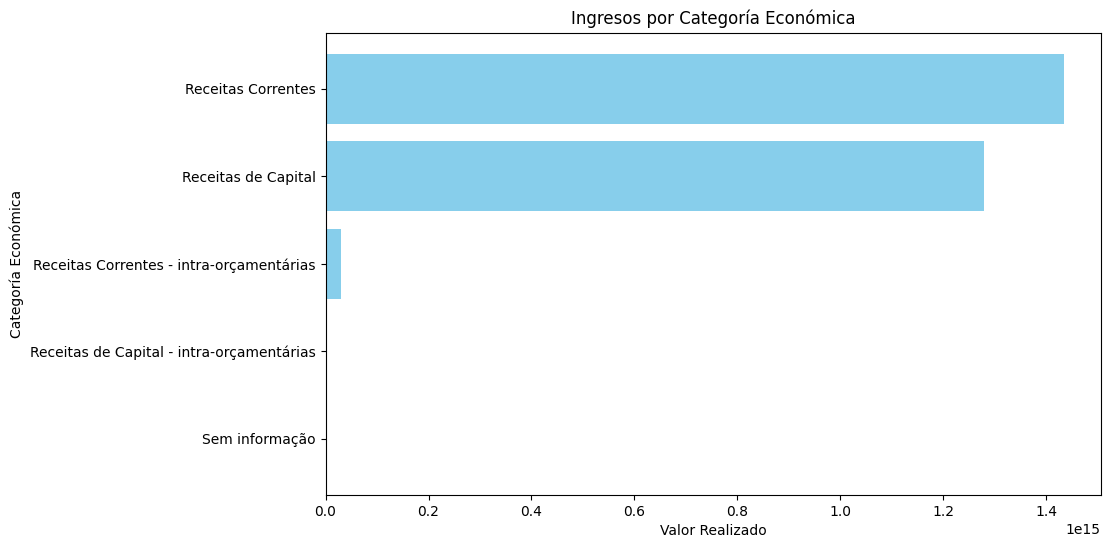

In [113]:
# Hago un grafico para representar la diferencia entre los diferentes ingresos por categoria.

plt.figure(figsize=(10, 6))
plt.barh(ingresos_por_categoria['CATEGORIA ECONOMICA'], ingresos_por_categoria['VALOR REALIZADO'], color='skyblue')
plt.xlabel("Valor Realizado")
plt.ylabel("Categoría Económica")
plt.title("Ingresos por Categoría Económica")
plt.gca().invert_yaxis()
plt.show()

- Compararación entre VALOR REALIZADO y VALOR REGISTRADO

In [114]:
# Agrupar por "CATEGORIA ECONOMICA" y calcular el total de valores registrados y realizados
ingresos_comparativos = (
    df.groupby("CATEGORIA ECONOMICA")[["VALOR REGISTRADO", "VALOR REALIZADO"]]
    .sum().
    reset_index()
    .rename(columns={"VALOR REGISTRADO": "TOTAL VALOR REGISTRADO","VALOR REALIZADO": "TOTAL VALOR REALIZADO",}))





In [115]:
# Calculo la participación porcentual de cada categoría para ambos valores
total_registrado = ingresos_comparativos["TOTAL VALOR REGISTRADO"].sum()
total_realizado = ingresos_comparativos["TOTAL VALOR REALIZADO"].sum()

ingresos_comparativos["PORCENTAJE REGISTRADO"] = (ingresos_comparativos["TOTAL VALOR REGISTRADO"] / total_registrado * 100)
ingresos_comparativos["PORCENTAJE REALIZADO"] = (ingresos_comparativos["TOTAL VALOR REALIZADO"] / total_realizado * 100)

# Ordeno por valores realizados
ingresos_comparativos = ingresos_comparativos.sort_values(
    "TOTAL VALOR REALIZADO", ascending=False)

# Visualizo las primeras categorías más significativas
print(ingresos_comparativos.head(10))



                         CATEGORIA ECONOMICA  TOTAL VALOR REGISTRADO  \
0                         Receitas Correntes  853,342,660,838,240.00   
2                        Receitas de Capital          481,051,614.00   
1   Receitas Correntes - intra-orçamentárias                    0.00   
3  Receitas de Capital - intra-orçamentárias                    0.00   
4                             Sem informação    2,418,208,204,377.00   

     TOTAL VALOR REALIZADO  PORCENTAJE REGISTRADO  PORCENTAJE REALIZADO  
0 1,433,420,728,911,773.00                  99.72                 52.24  
2 1,278,346,381,112,497.00                   0.00                 46.59  
1    29,289,747,777,513.00                   0.00                  1.07  
3     2,826,909,328,571.00                   0.00                  0.10  
4                 4,657.00                   0.28                  0.00  


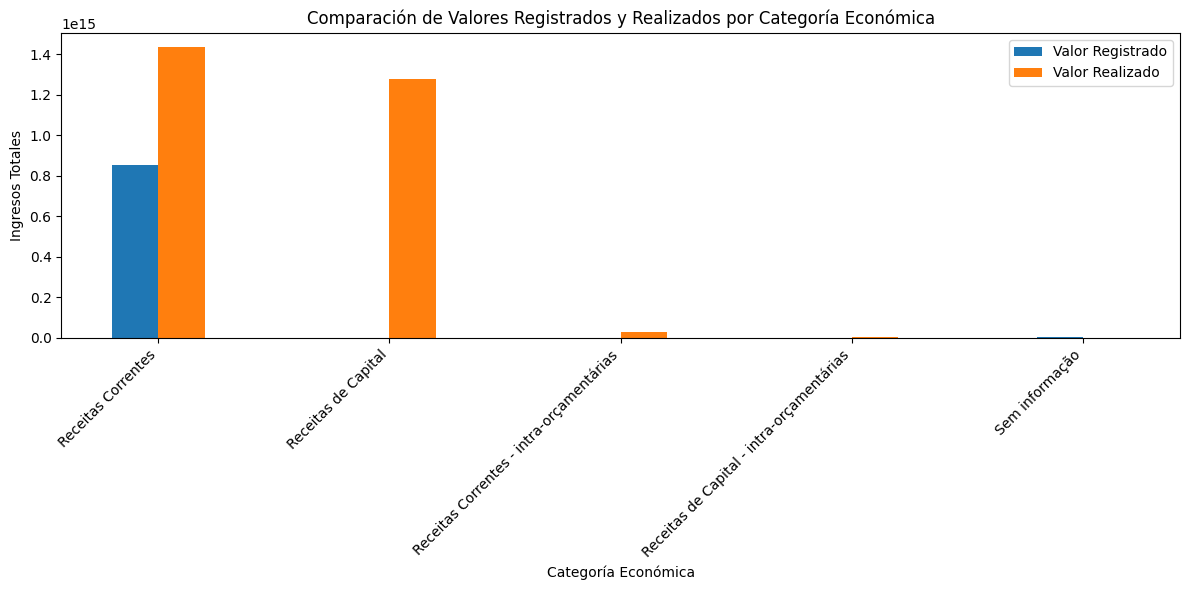

In [116]:
# Visualizo la comparación entre VALOR REGISTRADO y VALOR REALIZADO
import matplotlib.pyplot as plt
import numpy as np

categorias = ingresos_comparativos["CATEGORIA ECONOMICA"]
x = np.arange(len(categorias))  # Localización en el eje X
width = 0.20  # Ancho de las barras

fig, ax = plt.subplots(figsize=(12, 6))

# Barras para valor registrado y valor realizado
rects1 = ax.bar(x - width / 2, ingresos_comparativos["TOTAL VALOR REGISTRADO"], width, label="Valor Registrado")
rects2 = ax.bar(x + width / 2, ingresos_comparativos["TOTAL VALOR REALIZADO"], width, label="Valor Realizado")

# Añadir etiquetas y título
ax.set_xlabel("Categoría Económica")
ax.set_ylabel("Ingresos Totales")
ax.set_title("Comparación de Valores Registrados y Realizados por Categoría Económica")
ax.set_xticks(x)
ax.set_xticklabels(categorias, rotation=45, ha="right")
ax.legend()

fig.tight_layout()
plt.show()

- Analisis de categoria económica por años.

In [133]:
# Agrupamos por 'CATEGORIA ECONOMICA' y 'AÑO EJERCICIO' y calculamos la suma de 'VALOR REALIZADO'
ingresos_por_categoria_año = df.groupby(['CATEGORIA ECONOMICA', 'AÑO EJERCICIO'])['VALOR REALIZADO'].sum().reset_index()

# Visualizamos las primeras filas
ingresos_por_categoria_año.head()


,CATEGORIA ECONOMICA,AÑO EJERCICIO,VALOR REALIZADO
0,Receitas Correntes,2013,"122,536,707,535,257.00"
1,Receitas Correntes,2014,"125,002,674,123,884.00"
2,Receitas Correntes,2015,"128,768,677,692,815.00"
3,Receitas Correntes,2016,"176,590,150,160,174.00"
4,Receitas Correntes,2017,"160,871,667,722,543.00"


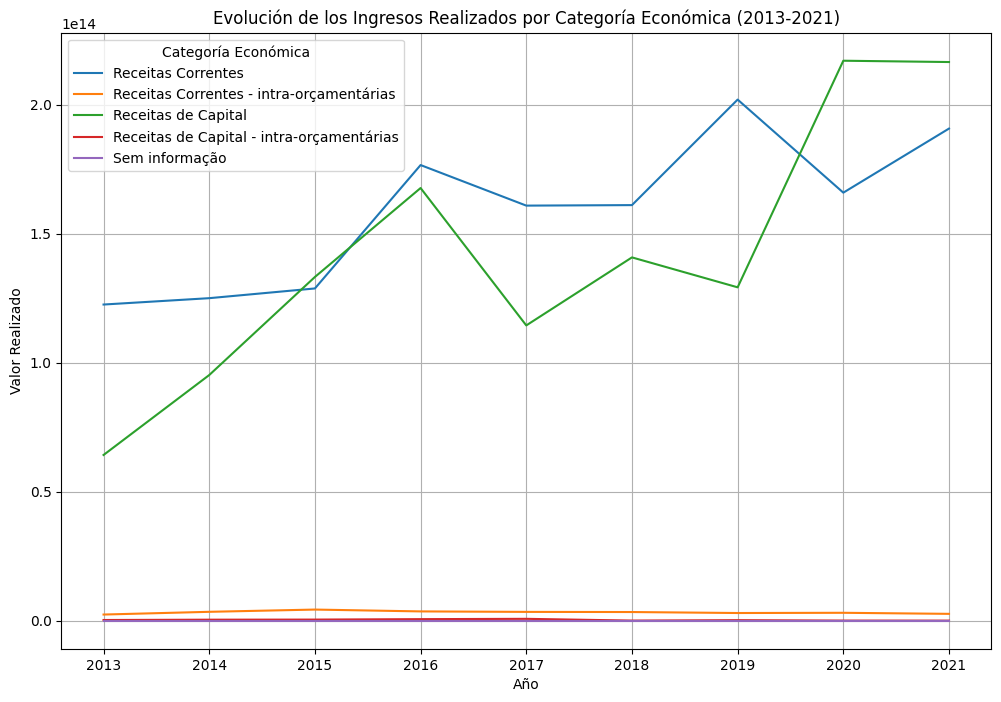

In [134]:
import matplotlib.pyplot as plt

# Graficamos los resultados
plt.figure(figsize=(12, 8))
for categoria in ingresos_por_categoria_año['CATEGORIA ECONOMICA'].unique():
    datos_categoria = ingresos_por_categoria_año[ingresos_por_categoria_año['CATEGORIA ECONOMICA'] == categoria]
    plt.plot(datos_categoria['AÑO EJERCICIO'], datos_categoria['VALOR REALIZADO'], label=categoria)

plt.title('Evolución de los Ingresos Realizados por Categoría Económica (2013-2021)')
plt.xlabel('Año')
plt.ylabel('Valor Realizado')
plt.legend(title='Categoría Económica')
plt.grid(True)
plt.show()


In [119]:
# Agrupo por 'ORIGEN INGRESO' y 'AÑO EJERCICIO' y calcular la suma de 'VALOR REALIZADO'
ingresos_por_origen_ingreso = df.groupby(['ORIGEN INGRESO', 'AÑO EJERCICIO'])['VALOR REALIZADO'].sum().reset_index()

# Visualizo las primeras filas
ingresos_por_origen_ingreso.head()


,ORIGEN INGRESO,AÑO EJERCICIO,VALOR REALIZADO
0,Alienação de Bens,2013,"228,519,478,206.00"
1,Alienação de Bens,2014,"110,313,422,606.00"
2,Alienação de Bens,2015,"150,109,785,073.00"
3,Alienação de Bens,2016,"125,599,283,160.00"
4,Alienação de Bens,2017,"88,813,046,831.00"


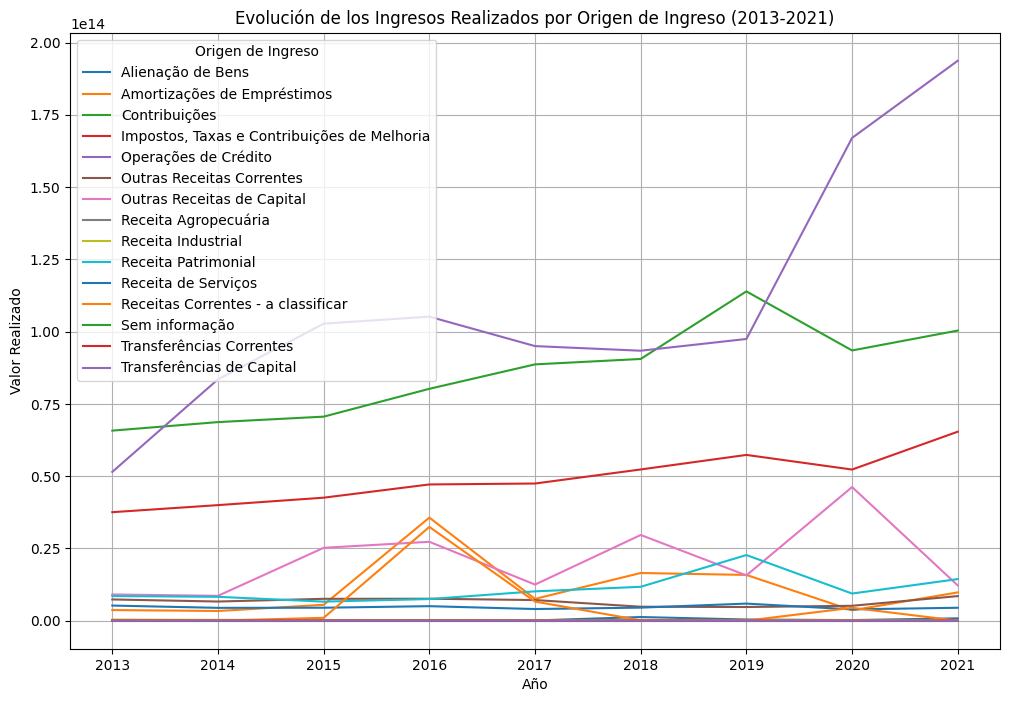

In [120]:
# Graficamos los resultados para 'ORIGEN INGRESO'
plt.figure(figsize=(12, 8))
for origen in ingresos_por_origen_ingreso['ORIGEN INGRESO'].unique():
    datos_origen = ingresos_por_origen_ingreso[ingresos_por_origen_ingreso['ORIGEN INGRESO'] == origen]
    plt.plot(datos_origen['AÑO EJERCICIO'], datos_origen['VALOR REALIZADO'], label=origen)

plt.title('Evolución de los Ingresos Realizados por Origen de Ingreso (2013-2021)')
plt.xlabel('Año')
plt.ylabel('Valor Realizado')
plt.legend(title='Origen de Ingreso')
plt.grid(True)
plt.show()


- Analizamos la diferencia de ingresos de la categoria economica

In [121]:
# Crear una columna para la diferencia entre ingresos previstos y realizados
df['DIFERENCIA INGRESOS'] = df['VALOR PREVISTO ACTUALIZADO'] - df['VALOR REALIZADO']

# Agrupar por la categoría de interés y calcular la diferencia promedio
diferencia_promedio_por_categoria = df.groupby('CATEGORIA ECONOMICA')['DIFERENCIA INGRESOS'].mean().reset_index()

# Visualizar el resultado
diferencia_promedio_por_categoria.head()


,CATEGORIA ECONOMICA,DIFERENCIA INGRESOS
0,Receitas Correntes,"-80,007,817.91"
1,Receitas Correntes - intra-orçamentárias,"-8,700,042.23"
2,Receitas de Capital,"5,652,701,999.87"
3,Receitas de Capital - intra-orçamentárias,"-18,379,664,998.64"
4,Sem informação,-18.12


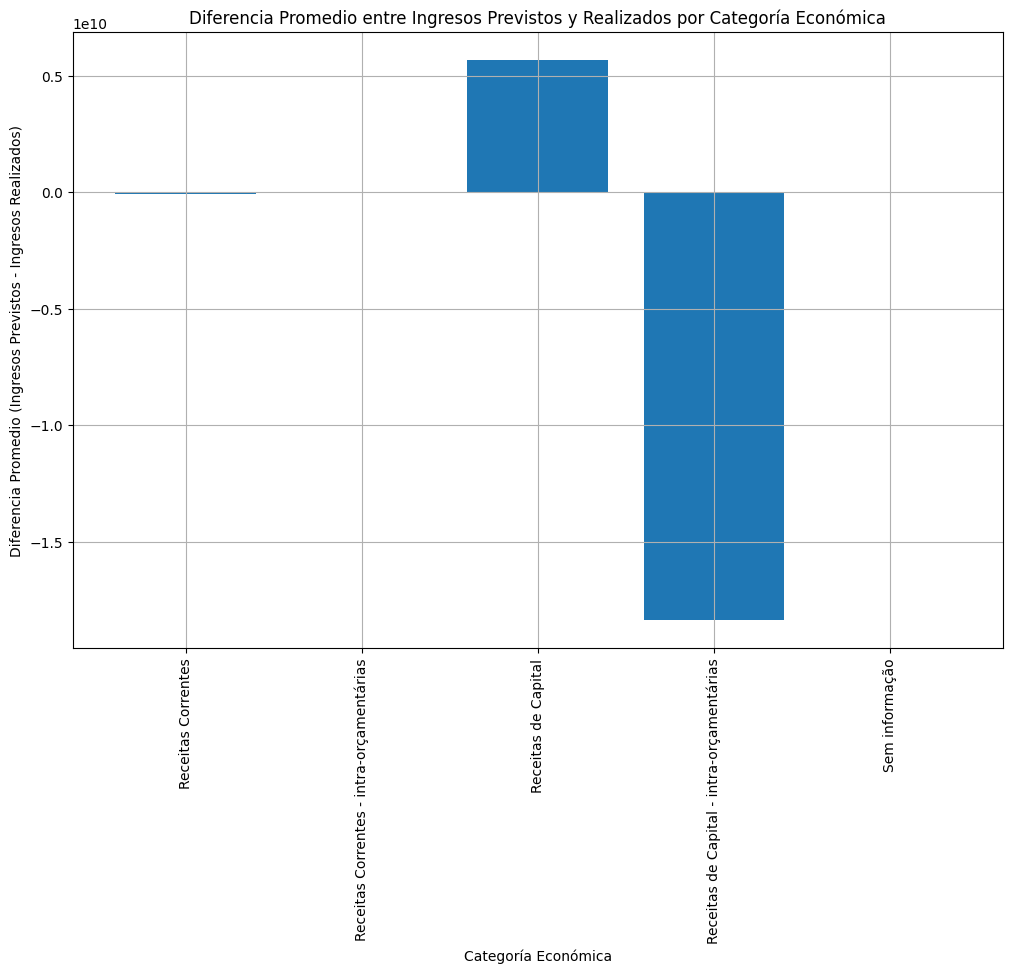

In [122]:
# Graficar la diferencia promedio por cada categoría económica
plt.figure(figsize=(12, 8))
plt.bar(diferencia_promedio_por_categoria['CATEGORIA ECONOMICA'], diferencia_promedio_por_categoria['DIFERENCIA INGRESOS'])
plt.title('Diferencia Promedio entre Ingresos Previstos y Realizados por Categoría Económica')
plt.xlabel('Categoría Económica')
plt.ylabel('Diferencia Promedio (Ingresos Previstos - Ingresos Realizados)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


   - Evaluar las tendencias a lo largo del tiempo, por ejemplo, cómo cambian los ingresos realizados de un mes a otro o de un año a otro.


In [123]:
# Extraer el año de la columna FECHA REGISTRO
df['AÑO REGISTRO'] = df['FECHA REGISTRO'].dt.year


In [124]:
# Agrupar por año y calcular la suma de ingresos realizados
ingresos_anuales = df.groupby('AÑO REGISTRO')['VALOR REALIZADO'].sum().reset_index()

# Visualizar el resultado
ingresos_anuales.head()


,AÑO REGISTRO,VALOR REALIZADO
0,"2,013.00","189,440,757,301,716.00"
1,"2,014.00","224,065,920,240,152.00"
2,"2,015.00","266,752,359,068,805.00"
3,"2,016.00","348,497,932,376,402.00"
4,"2,017.00","279,470,031,411,226.00"


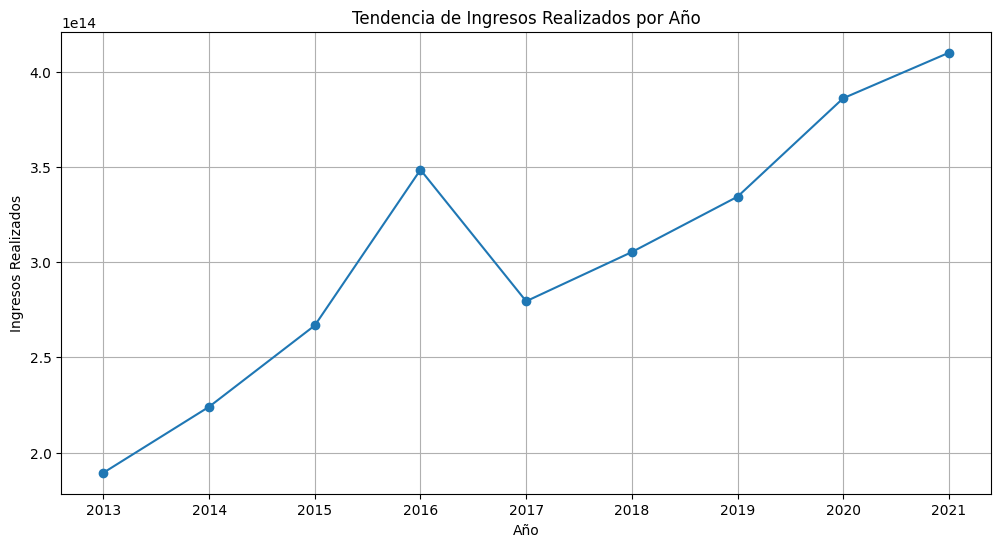

In [125]:
# Graficar los ingresos realizados por año
plt.figure(figsize=(12, 6))
plt.plot(ingresos_anuales['AÑO REGISTRO'], ingresos_anuales['VALOR REALIZADO'], marker='o')
plt.title('Tendencia de Ingresos Realizados por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos Realizados')
plt.grid(True)
plt.show()


3. **Identificación de Discrepancias:**

   - Investigar las categorías con mayor diferencia entre lo previsto y lo realizado, identificando patrones en la subejecución o sobre ejecución.

In [126]:
# Calcular la diferencia entre lo previsto y lo realizado
df['DIFERENCIA'] = df['VALOR REALIZADO'] - df['VALOR PREVISTO ACTUALIZADO']
# Agrupar por categoría económica y calcular la diferencia promedio
discrepancias_categoria = df.groupby('CATEGORIA ECONOMICA')['DIFERENCIA'].mean().reset_index()

# Ordenar por la magnitud de la diferencia
discrepancias_categoria = discrepancias_categoria.sort_values(by='DIFERENCIA', ascending=False)



In [127]:
# Ver las categorías con mayor discrepancia (tanto positivas como negativas)
discrepancias_categoria.head(10)  # Top 10 categorías con mayor diferencia


,CATEGORIA ECONOMICA,DIFERENCIA
3,Receitas de Capital - intra-orçamentárias,"18,379,664,998.64"
0,Receitas Correntes,"80,007,817.91"
1,Receitas Correntes - intra-orçamentárias,"8,700,042.23"
4,Sem informação,18.12
2,Receitas de Capital,"-5,652,701,999.87"


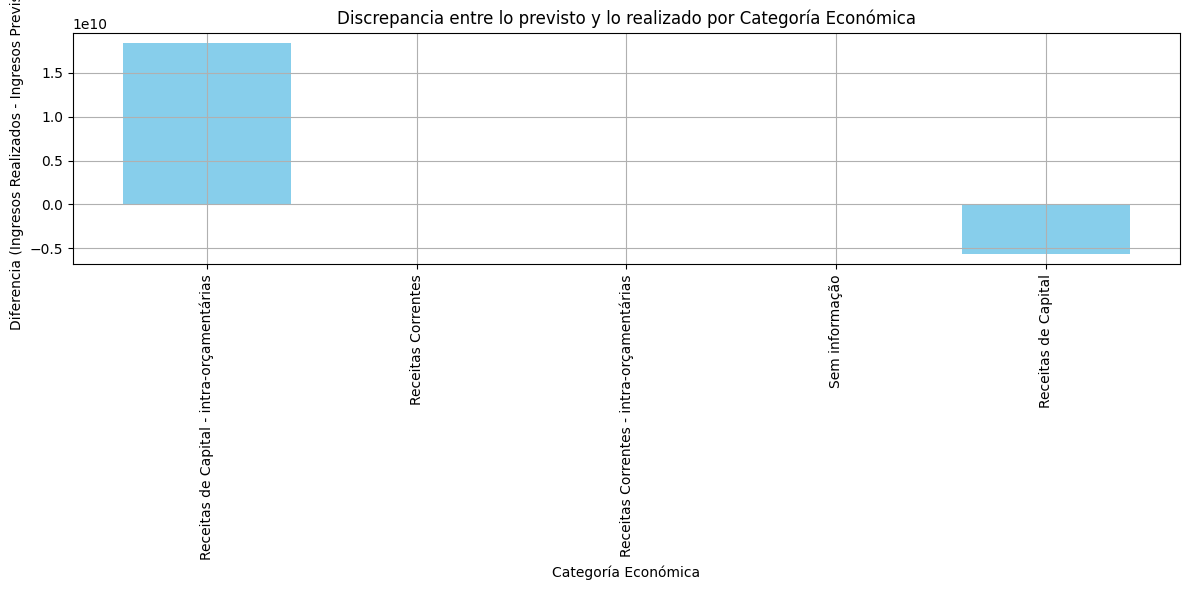

In [128]:
# Visualizar las discrepancias por categoría económica en un gráfico de barras verticales
plt.figure(figsize=(12, 6))
plt.bar(discrepancias_categoria['CATEGORIA ECONOMICA'], discrepancias_categoria['DIFERENCIA'], color='skyblue')
plt.title('Discrepancia entre lo previsto y lo realizado por Categoría Económica')
plt.xlabel('Categoría Económica')
plt.ylabel('Diferencia (Ingresos Realizados - Ingresos Previstos)')
plt.xticks(rotation=90)  # Rotar etiquetas para mejor legibilidad
plt.grid(True)
plt.tight_layout()
plt.show()



2. **Diagramas de Caja:**

   - Evaluar la dispersión de las diferencias entre los valores previstos y realizados en diferentes categorías.

In [129]:
# Calcular la diferencia entre lo previsto y lo realizado
df['DIFERENCIA'] = df['VALOR PREVISTO ACTUALIZADO'].astype(float) - df['VALOR REALIZADO'].astype(float)

# Calcular la desviación estándar y el coeficiente de variación por categoría económica
dispersión_categoria = df.groupby('CATEGORIA ECONOMICA')['DIFERENCIA'].agg(['std', 'mean'])

# Calcular el coeficiente de variación (desviación estándar / media)
dispersión_categoria['coef_var'] = dispersión_categoria['std'] / dispersión_categoria['mean']

# Mostrar los resultados
dispersión_categoria.sort_values(by='coef_var', ascending=False, inplace=True)
print(dispersión_categoria)


                                                           std  \
CATEGORIA ECONOMICA                                              
Receitas de Capital                       1,710,422,759,497.07   
Receitas de Capital - intra-orçamentárias   118,669,810,365.07   
Sem informação                                          195.53   
Receitas Correntes                          120,455,909,060.06   
Receitas Correntes - intra-orçamentárias     52,262,541,147.46   

                                                        mean  coef_var  
CATEGORIA ECONOMICA                                                     
Receitas de Capital                         5,652,701,999.87    302.58  
Receitas de Capital - intra-orçamentárias -18,379,664,998.64     -6.46  
Sem informação                                        -18.12    -10.79  
Receitas Correntes                            -80,007,817.91 -1,505.55  
Receitas Correntes - intra-orçamentárias       -8,700,042.23 -6,007.16  


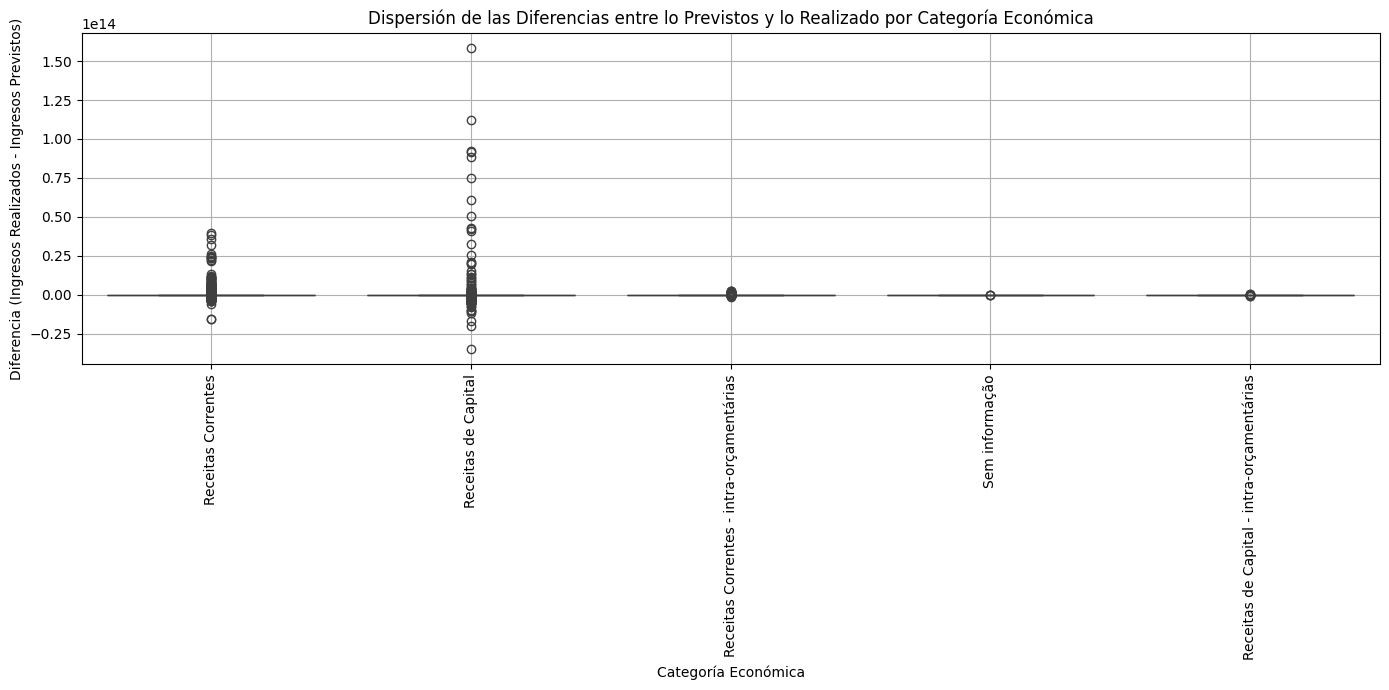

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de boxplot para visualizar la dispersión por categoría económica
plt.figure(figsize=(14, 7))
sns.boxplot(x='CATEGORIA ECONOMICA', y='DIFERENCIA', data=df)
plt.title('Dispersión de las Diferencias entre lo Previstos y lo Realizado por Categoría Económica')
plt.xlabel('Categoría Económica')
plt.ylabel('Diferencia (Ingresos Realizados - Ingresos Previstos)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


## Fase 5: Conclusiones y Recomendaciones

1. **Resumen de Hallazgos:**

   - Identificar las categorías y períodos con mayor discrepancia entre lo previsto y lo realizado.

   - Describir tendencias observadas en la ejecución de ingresos.

2. **Propuestas de Mejora:**
   - Sugerir acciones para mejorar la precisión en la planificación y ejecución de los ingresos.

In [131]:
# Identificar las categorías con las mayores discrepancias
discrepancia_categoria = df.groupby('CATEGORIA ECONOMICA')['DIFERENCIA'].agg(['mean', 'std', 'max', 'min'])
discrepancia_categoria = discrepancia_categoria.sort_values(by='mean', ascending=False)

# Mostrar las categorías con mayor discrepancia en la ejecución
print(discrepancia_categoria)


                                                        mean  \
CATEGORIA ECONOMICA                                            
Receitas de Capital                         5,652,701,999.87   
Sem informação                                        -18.12   
Receitas Correntes - intra-orçamentárias       -8,700,042.23   
Receitas Correntes                            -80,007,817.91   
Receitas de Capital - intra-orçamentárias -18,379,664,998.64   

                                                           std  \
CATEGORIA ECONOMICA                                              
Receitas de Capital                       1,710,422,759,497.07   
Sem informação                                          195.53   
Receitas Correntes - intra-orçamentárias     52,262,541,147.46   
Receitas Correntes                          120,455,909,060.06   
Receitas de Capital - intra-orçamentárias   118,669,810,365.07   

                                                             max  \
CATEGORIA ECONOMICA 

In [135]:
# Agrupar por año y sumar los ingresos realizados
ingresos_anuales = df.groupby('AÑO EJERCICIO')['VALOR REALIZADO'].sum()
ingresos_anuales

AÑO EJERCICIO
2013   189,440,757,301,716.00
2014   224,065,920,240,152.00
2015   266,752,359,068,805.00
2016   348,497,932,376,402.00
2017   279,470,031,411,226.00
2018   305,297,251,169,015.00
2019   334,362,767,341,212.00
2020   386,046,062,333,731.00
2021   409,950,685,892,752.00
Name: VALOR REALIZADO, dtype: float64

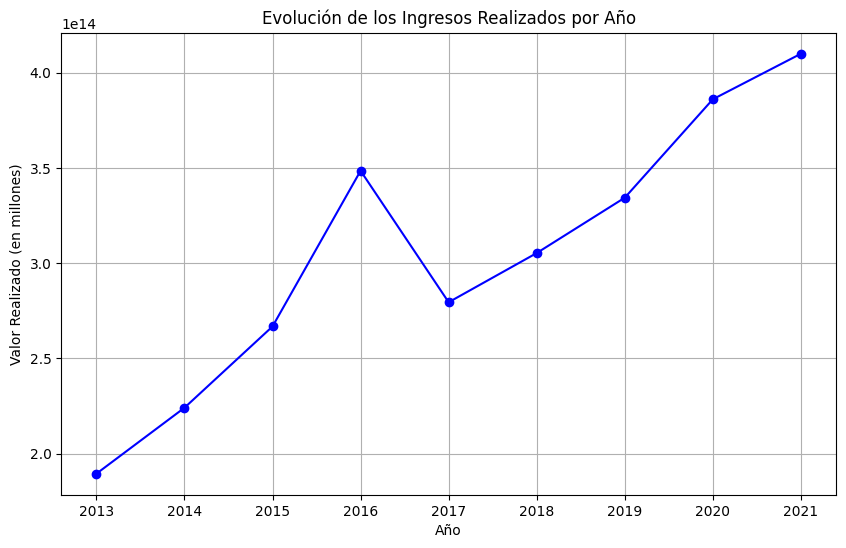

In [137]:
# Creo un gráfico para visualizar las  tendencias por años.
plt.figure(figsize=(10, 6))
plt.plot(ingresos_anuales.index, ingresos_anuales.values, marker='o', linestyle='-', color='b')
plt.title('Evolución de los Ingresos Realizados por Año')
plt.xlabel('Año')
plt.ylabel('Valor Realizado (en millones)')
plt.grid(True)
plt.show()


## Resumen de Hallazgos

### - Tendencias de los ingresos a lo largo de los años
Los ingresos observados en el periodo de análisis muestran una tendencia creciente durante los años, con un aumento progresivo en los valores realizados. Sin embargo, en algunos años, las diferencias entre lo previsto y lo realizado son significativas, lo que sugiere que la planificación de ingresos podría no estar alineada con los resultados reales.

### - Discrepancias por Año
Las variaciones anuales en los ingresos previstos vs. los realizados muestran que algunos años tuvieron un desempeño muy por debajo de lo esperado. Es posible que factores como cambios en la política económica, crisis económicas o eventos extraordinarios hayan influido en la recaudación.
Estacionalidad y Factores Externos: Algunas categorías, especialmente las relacionadas con el consumo (como "Impuestos al valor agregado"), muestran variaciones estacionales que podrían estar relacionadas con el comportamiento del mercado, festivos o eventos especiales.

### - Discrepancias entre lo previsto y lo realizado 
En varios años, la diferencia entre los ingresos previstos y los ingresos realmente ejecutados muestra patrones de subejecución en algunos periodos. Esto indica que, en ocasiones, las previsiones de ingresos fueron demasiado optimistas, o no se alcanzaron las metas por factores fuera del control administrativo. Estas diferencias se deben analizar a fondo para detectar posibles causas, como cambios en la economía, en las políticas fiscales, o errores en las proyecciones.

## Propuestas de Mejora

### - Revisión de las previsiones anuales
Se recomienda realizar una revisión más exhaustiva de las previsiones de ingresos, con base en análisis históricos y en una mejor recopilación de datos de cada período. Esto podría incluir la incorporación de datos económicos externos o predicciones más conservadoras, especialmente en los años en los que las diferencias fueron más marcadas.

### - Monitoreo constante de la ejecución de ingresos
Implementar un sistema de monitoreo más frecuente de los ingresos a lo largo del año, comparando los ingresos reales con los previstos de forma trimestral o mensual. Esto permitiría tomar decisiones más ágiles y ajustar las estrategias de recolección si se detectan desviaciones importantes a tiempo.

### - Análisis de causas de las discrepancias 
Es importante investigar más a fondo las causas de la subejecución o sobreejecución de los ingresos. Factores como cambios en las políticas fiscales, variaciones en el comportamiento de los contribuyentes o errores en los procesos administrativos podrían ser responsables de las diferencias observadas.


## 3. Conclusión Final

En resumen, los hallazgos del análisis de los ingresos públicos indican una necesidad urgente de mejorar la precisión de las previsiones y la eficiencia en la recaudación. Al implementar modelos predictivos más sofisticados, realizar auditorías en las categorías de mayor discrepancia, y establecer un proceso de revisión continua, se puede optimizar la planificación de ingresos y reducir las diferencias entre lo previsto y lo realizado. Además, la mejora en la toma de decisiones basada en datos permitirá ajustar estrategias y políticas en tiempo real para maximizar la efectividad de la recaudación de ingresos públicos.